# Relações de ordem e de equivalência


[Abrir no Colab este ficheiro para o poder executar](https://colab.research.google.com/github/melroleandro-solidreturn/Matematica-Discreta-para-Hackers/blob/main/Chapter7_Relacaoes_Equivalencia_Ordem.ipynb.ipynb)


Neste capítulo, abordamos os conceitos fundamentais das relações de ordem (incluindo ordens parciais) e das relações de equivalência, que constituem pilares na matemática discreta e desempenham um papel central na ciência da computação. Analisaremos como estas relações organizam os conjuntos, permitindo agrupar e classificar os elementos com base em propriedades definidas.

Para além da exposição teórica, aplicaremos estes conceitos na prática, utilizando Python para desenvolver implementações que ilustram a  aplicação das relações de ordem e equivalência na resolução de problemas.

## Relações de Equivalência
Uma relação de equivalência generaliza a noção de igualdade, agrupando elementos com características comuns.  

**Definição 2:** Relação de Equivalência

Uma relação binária $R$ num conjunto $A$ é uma **relação de equivalência** se for:  
1. **Reflexiva:** $\forall x \in A, \; x R x$.  
2. **Simétrica:** $\forall x, y \in A, \; x R y \Rightarrow y R x$.  
3. **Transitiva:** $\forall x, y, z \in A, \; x R y \wedge y R z \Rightarrow x R z$.  

**Exemplo 1:** Irmãos Biológicos  
Seja $A$ o conjunto de todas as pessoas. A relação "ser irmão biológico de" é:  
- **Reflexiva:** Toda pessoa $x$ é irmã de si mesma (considerando a mesma família).  
- **Simétrica:** Se a pessoa $x$ é irmã da pessoa $x$, então a pessoa $y$ irmã da pessoa $x$.  
- **Transitiva:** Se a pessoa $x$ é irmã da pessoa $y$ e a pessoa $y$ é irmã da pessoa $z$, então a pessoa $x$ é irmã da pessoa $z$.  

**Exemplo 2:** Códigos Postais  
Considere o conjunto de moradas em Portugal. Duas moradas são equivalentes se partilham o **mesmo código postal**:  
- **Reflexiva:** Toda morada tem o mesmo código postal que si própria.  
- **Simétrica:** Se a morada $X$ partilha código postal com $Y$, então $Y$ partilha com $X$.  
- **Transitiva:** Se $X$ partilha com $Y$ e $Y$ com $Z$, então $X$ partilha com $Z$.  

**Notação:** Para relações de equivalência, usamos $a \sim b$ para denotar "$a$ é equivalente a $b$.

## Classes de Equivalência
As relações de equivalência dividem o conjunto em subconjuntos disjuntos chamados **classes de equivalência**, onde todos os elementos são equivalentes entre si.  

**Definição 3:** Classe de Equivalência 
Para $a \in A$, a classe de equivalência de $a$, denotada por $[a]$, é:  

$$
[a] = \{ x \in A \mid x \sim a \}.
$$

**Exemplo 3:** Códigos Postais  
A classe de equivalência das moradas com código postal **1000-001 Lisboa** inclui todas as moradas nessa zona. Qualquer morada do grupo pode representar a classe (ex: Rua Augusta representa a mesma classe que o Terreiro do Paço).  

**Exemplo 4:**  
Considere a relação $x \equiv y \pmod{10}$ (resto da divisão por 10 igual). As classes são:  
- $[0] = \{0, 10, 20, \ldots\}$  
- $[1] = \{1, 11, 21, \ldots\}$  
- ...  
- $[9] = \{9, 19, 29, \ldots\}$



In [22]:
def e_equivalencia(R, A):
    # Reflexividade
    for a in A:
        if (a, a) not in R:
            return False
    # Simetria
    for a, b in R:
        if (b, a) not in R:
            return False
    # Transitividade
    for a, b in R:
        for b_s, c in R:
            if b == b_s and (a, c) not in R:
                return False
    return True

def classes_equivalencia(R, A):
    classes = {}
    for a in A:
        # Conjunto dos elementos x relacionados a a (x R a ou a R x)
        classes[a] = {x for x, y in R if x == a or y == a}

    # Converter os valores do dicionário em uma lista de conjuntos
    lista_classes = list(classes.values())

    # Remover duplicatas
    classes_unicas = []
    for classe in lista_classes:
        if classe not in classes_unicas:
            classes_unicas.append(classe)

    return classes_unicas

A = {0, 1, 2, 3}
R = {(0, 0), (1, 1), (2, 2), (3, 3), (0, 2), (2, 0), (1, 3), (3, 1)}
print("É equivalência?", e_equivalencia(R, A))  # Saída: True
print("Classes:", classes_equivalencia(R, A))  # Saída: {frozenset({0, 2}), frozenset({1, 3})}

É equivalência? True
Classes: [{0, 2}, {1, 3}]


## Partições 
Uma partição divide um conjunto em subconjuntos não vazios e disjuntos.  

**Definição 4:** Partição  
Seja $I$ um conjunto de indices. Uma coleção de subconjuntos $\{A_i\}_{i\in I}$ de $A$ é uma partição se:  
1. $\bigcup_{i\in I} A_i = A$.  
2. $A_i \cap A_j = \emptyset$ se $i \neq j$ para todo $i,j\in I$.  

**Exemplos 5:** Partição 
1. **Dias da Semana:** Partição em dias úteis e fim de semana.  
2. **Números Inteiros:** Partição em pares e ímpares.  
3. **Cores do Arco-Íris:** Partição em 7 cores distintas.  

**Relação com Classes de Equivalência:**

**Teorema:**  
As classes de equivalência de $A$ formam uma **partição** de $A$:  
1. **União:** Cada elemento pertence a uma classe.  
2. **Disjunção:** Classes diferentes são disjuntas.  


Ou seja, toda relação de equivalência gera uma partição (suas classes), e toda partição define uma relação de equivalência ("pertence ao mesmo subconjunto").  


**Exemplo 6: Agrupar Números por Resto**  
O código abaixo agrupa números de 0 a 99 pelo resto da divisão por 10:  


In [23]:
classes = {}
for i in range(100):
    resto = i % 10
    if resto in classes:
        classes[resto].append(i)
    else:
        classes[resto] = [i]

for chave, valores in classes.items():
    print(f"Classe {chave}: {valores}")

Classe 0: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Classe 1: [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
Classe 2: [2, 12, 22, 32, 42, 52, 62, 72, 82, 92]
Classe 3: [3, 13, 23, 33, 43, 53, 63, 73, 83, 93]
Classe 4: [4, 14, 24, 34, 44, 54, 64, 74, 84, 94]
Classe 5: [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
Classe 6: [6, 16, 26, 36, 46, 56, 66, 76, 86, 96]
Classe 7: [7, 17, 27, 37, 47, 57, 67, 77, 87, 97]
Classe 8: [8, 18, 28, 38, 48, 58, 68, 78, 88, 98]
Classe 9: [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]


**Exemplo 7:** Verifica se uma coleção de conjuntos forma uma partição de um conjunto

Uma função em Python que verifica se uma coleção de conjuntos forma uma partição de um conjunto AA:


In [24]:
def eh_particao(colecao_conjuntos: list[set], A: set) -> bool:
    """
    Verifica se uma coleção de conjuntos é uma partição do conjunto A.

    Args:
        colecao_conjuntos (list[set]): Lista de conjuntos a serem verificados.
        A (set): Conjunto original.

    Returns:
        bool: True se a coleção é uma partição de A, False caso contrário.
    """

    # Caso especial: se A é vazio, a partição também deve ser vazia
    if not A:
        return not colecao_conjuntos

    # 1. Verificar se todos os conjuntos na coleção são não vazios
    for conjunto in colecao_conjuntos:
        if len(conjunto) == 0:
            return False

    # 2. Verificar se todos os elementos dos conjuntos pertencem a A
    for conjunto in colecao_conjuntos:
        if not conjunto.issubset(A):
            return False

    # 3. Verificar se a união dos conjuntos é igual a A
    uniao = set().union(*colecao_conjuntos)
    if uniao != A:
        return False

    # 4. Verificar se os conjuntos são disjuntos dois a dois
    for i in range(len(colecao_conjuntos)):
        for j in range(i + 1, len(colecao_conjuntos)):
            if colecao_conjuntos[i].intersection(colecao_conjuntos[j]):
                return False

    return True

**Funcionamento da Função:**
1. **Verificação de Conjuntos Não Vazios:** Garante que todos os subconjuntos na coleção tenham pelo menos um elemento.
2. **Subconjuntos de $A$:** Confirma que todos os elementos dos subconjuntos pertencem a $A$.
3. **União Igual a $A$:** A união dos subconjuntos deve cobrir todos os elementos de $A$.
4. **Disjunção:** Os subconjuntos não podem compartilhar elementos entre si.


**Exemplos 8:**

1. **Partição válida**

In [25]:
A = {1, 2, 3, 4}
colecao = [{1}, {2}, {3, 4}]
print(eh_particao(colecao, A))  # Saída: True

True


2. **Conjunto vazio**

In [26]:
A = set()
colecao = []
print(eh_particao(colecao, A))  # Saída: True (partição vazia de A vazio)

True


3. **Conjuntos com elementos fora de $A$**

In [27]:
A = {1, 2}
colecao = [{1}, {2}, {3}]
print(eh_particao(colecao, A))  # Saída: False (3 ∉ A)

False


4. **Conjuntos não disjuntos**

In [28]:
A = {1, 2, 3}
colecao = [{1, 2}, {2, 3}]
print(eh_particao(colecao, A))  # Saída: False (interseção entre conjuntos)

False


## Relação de Ordem Parcial

É frequente recorrer a ordens para organizar os elementos de um conjunto. Por exemplo, ordenam-se palavras $ w_1 $ e $ w_2 $, dizendo que $ w_1 \leq w_2 $ se $ w_1 $ aparece no dicionário antes de $ w_2 $. Num cronograma de um projeto, descrito por uma relação entre tarefas, escrevemos $ x \leq y $ se a tarefa $ x $ antecede a tarefa $ y $. No conjunto dos números inteiros, é habitual assumir que os números estão ordenados pela relação "menor ou igual".

Uma **relação de ordem parcial** definida num conjunto $ A $ é uma relação que satisfaz as seguintes propriedades:
1. **Reflexiva**: Para todo $ a \in A $, $ (a, a) \in R $.
2. **Antissimétrica**: Para todo $ a, b \in A $, se $ (a, b) \in R $ e $ (b, a) \in R $, então $ a = b $.
3. **Transitiva**: Para todo $ a, b, c \in A $, se $ (a, b) \in R $ e $ (b, c) \in R $, então $ (a, c) \in R $.

**Exemplo 9**: A relação "menor ou igual", $ \leq $, definida no conjunto dos números inteiros $ \mathbb{Z} $, é uma ordem parcial, pois:
1. $ \leq $ é reflexiva: para todo $ n \in \mathbb{Z} $, $ n \leq n $.
2. $ \leq $ é antissimétrica: para todo $ n, m \in \mathbb{Z} $, se $ n \leq m $ e $ m \leq n $, então $ n = m $.
3. $ \leq $ é transitiva: para todo $ n, m, p \in \mathbb{Z} $, se $ n \leq m $ e $ m \leq p $, então $ n \leq p $.

Note-se que a relação inversa de $ \leq $, denotada por $ \geq $ (ou seja, $ \leq^{-1} $), é também uma ordem parcial em $ \mathbb{Z} $. Para enfatizar a ordenação, escrevemos $ (\mathbb{Z}, \leq) $ e $ (\mathbb{Z}, \geq)$, designando-os como conjuntos parcialmente ordenados.

**Exemplo 10**: A relação $ R $ definida em $ A = \{1, 2, 3, 4, 6\} $, onde $ a R b $ se $ a $ divide $ b $, é uma ordem parcial em $ A $. Neste caso, a relação pode ser expressa em extensão por:

$$ 
R = \{(1, 1), (1, 2), (1, 3), (1, 4), (1, 6), (2, 2), (2, 4), (2, 6), (3, 3), (3, 6), (4, 4), (6, 6)\} 
$$

É comum escrever $ (A, R) $ para explicitar que a relação $ R $ é usada para ordenar os elementos do conjunto $ A $.

**Definição 5:** Conjunto Parcialmente Ordenado 
O par $ P = (A, R) $ é um **conjunto parcialmente ordenado (CPO)** se $ A $ é um conjunto e $ R $ é uma ordem parcial em $ A $. É habitual representar as relações de ordem parcial pelo símbolo $ \leq $, denotando genericamente um CPO por $ P = (A, \leq) $, quando $ \leq $ é uma ordem parcial definida em $ A $.

Genericamente, para uma relação $ R $ definida num conjunto $ A $ e um par de elementos $ (a, b) \in A \times A $, dizemos que $ a $ e $ b $ estão em relação se $ a R b $ ou $ b R a $; caso contrário, $ a $ e $ b $ não estão em relação. Neste contexto, num CPO, definimos:

**Definição 6:** Comparáveis
Num conjunto parcialmente ordenado $P = (A, \leq) $, dois elementos $ a $ e $ b $ de $ A $ dizem-se **comparáveis** se $ a \leq b $ ou $ b \leq a $.

Por outro lado, se num CPO $P = (A, \leq)$ não se verifica nem $a \leq b $ nem $b \leq a$, $ a $ e $ b $ dizem-se **não comparáveis**.

**Exemplo 11**: Seja $\leq $ a relação parcialmente ordenada definida em $A = \{1, 2, 3, 4, 6\}$, onde $a \leq b$ se $a$ divide $b$. No CPO $ (A, \leq) $:
- Os elementos $2$ e $4$ são comparáveis, pois $2$ divide $4$ ($2 \leq 4 $).
- Os elementos $3$ e $4$ não são comparáveis, uma vez que $3$ não divide $4$ e $4$ não divide $3$.

Neste sentido, o conjunto $ \{1, 2, 3, 6\}$ é formado por elementos comparáveis dois a dois, enquanto o conjunto $\{3, 4\}$ é formado por elementos não comparáveis.

Um conjunto parcialmente ordenado $(A, \leq)$ diz-se um **conjunto totalmente ordenado** se, para qualquer par de elementos $a$ e $b$ em $ A$, $a $ e $ b$ forem comparáveis, ou seja, se $a \leq b $ ou $b \leq a $ para todo $a, b \in A$.

O CPO $(\mathbb{Z}, \leq)$ é um exemplo de um conjunto totalmente ordenado, segundo a ordem usual de "menor ou igual". Para todo par de inteiros $x$ e $y$, ou $x \leq y$, ou $y \leq x$.



## Diagrama de Hasse

Qualquer relação de ordem parcial num conjunto finito pode ser representada graficamente por um **diagrama de Hasse**. Ao contrário dos diagramas sagitais, neste diagrama os elementos são ligados por arcos não dirigidos. O diagrama de Hasse é obtido simplificando o diagrama sagital da relação, removendo todos os lacetes (devidos à reflexividade) e todos os arcos que podem ser deduzidos pela transitividade da relação. Convenciona-se, neste tipo de representação, que, se um elemento precede outro na relação \( \leq \), o primeiro é posicionado mais abaixo na figura, permitindo suprimir a orientação usada no diagrama sagital sem gerar ambiguidade.

**Exemplo 12**: Para desenhar o diagrama de Hasse que representa a ordem parcial $ \leq = \{(a, b) : a \text{ divide } b\} $ no conjunto $ A = \{1, 2, 3, 4, 6, 8, 12\} $.


![image](images/hasse1.png)

Começamos por desenhar, em (a), o diagrama sagital da relação. Em (b), removemos todos os lacetes. De seguida, eliminamos todos os arcos que podem ser inferidos pela transitividade. Os arcos removidos neste terceiro passo são: $ (1, 4) $, $(1, 6) $, $ (1, 8) $, $ (1, 12) $, $ (2, 8) $, $ (2, 12) $ e $ (3, 12) $.

Ordenando os vértices de forma a que as setas apontem todas para cima e removendo a orientação, obtemos o diagrama de Hasse. O diagrama resultante desta transformação é apresentado na figura acima, em (c).

De seguida, apresentamos mais alguns exemplos de relações representadas através de diagramas de Hasse.

**Exemplo 13**: Em baixo, apresentamos o diagrama de Hasse da relação parcialmente ordenada $ \leq $, definida em $ A = \{1, 2, 3, 4, 6\} $, onde $ a \leq b $ se $ a $ divide $ b $.

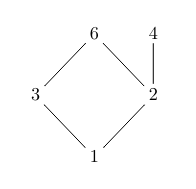

**Exemplo 14**: Em baixo apresentamos o diagrama de Hasse do conjunto das partes de $\{1, 2, 3\}$
ordenadas pela relação de inclusão.

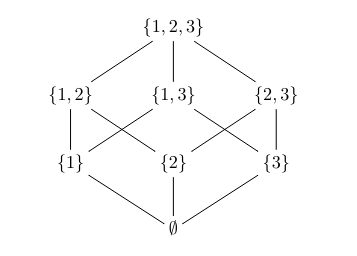

O diagrama de Hasse representa apenas as **relações de cobertura** de um poset. Uma relação $ (a, b) $ é de cobertura se:
- $ a < b $ (ou seja, $ (a, b) \in R$ e $ a \neq b $),
- Não existe $ c \neq a, b $ tal que $ a < c < b $ (ou seja, $ (a, c) \in R $ e $ (c, b) \in R $).

A função deve:
1. Receber o conjunto $ X $ e a lista de pares $ R $ (assumindo que é um poset válido, com pares reflexivos como $ (x, x) $).
2. Filtrar $ R$ para manter apenas os pares de cobertura.
3. Retornar uma lista de pares representando o diagrama de Hasse.

In [29]:
def hasse_diagram(X, relations):
    # Converter relations para um conjunto para busca eficiente
    rel_set = set(relations)

    # Inicializar a lista de pares do diagrama de Hasse
    hasse_pairs = []

    # Iterar sobre cada par (a, b) em relations
    for a, b in relations:
        # Ignorar pares reflexivos (a, a)
        if a == b:
            continue

        # Verificar se (a, b) é uma relação de cobertura
        is_cover = True
        for c in X:
            if c != a and c != b:
                # Se existe c tal que (a, c) e (c, b) estão em relations,
                # então (a, b) não é de cobertura
                if (a, c) in rel_set and (c, b) in rel_set:
                    is_cover = False
                    break

        # Se for uma relação de cobertura, adicionar à lista
        if is_cover:
            hasse_pairs.append((a, b))

    return hasse_pairs

# Teste com o exemplo fornecido
X = {1, 2, 3}
relations = [(1, 1), (2, 2), (3, 3), (1, 2), (1, 3), (2, 3)]
resultado = hasse_diagram(X, relations)
print("Diagrama de Hasse:", resultado)

Diagrama de Hasse: [(1, 2), (2, 3)]


### **Explicação do Código**

1. **Conversão para Conjunto**:
   - `rel_set = set(relations)` converte a lista de pares num conjunto para buscas eficientes com $ O(1) $ em média.

2. **Iteração sobre Pares**:
   - Para cada $ (a, b) $ em $ \text{relations} $, verificamos se é uma relação de cobertura.
   - Ignoramos pares reflexivos ($ a = b $), pois o diagrama de Hasse não os inclui.

3. **Verificação de Cobertura**:
   - Para cada $(a, b) $ com $ a \neq b $:
     - Iteramos sobre todos os $ c \in X $ onde $ c \neq a $ e $ c \neq b $.
     - Se $ (a, c) \in \text{rel\_set} $ e $ (c, b) \in \text{rel\_set} $, existe um $ c $ entre $ a $ e $ b $, então $ (a, b) $ não é de cobertura.
     - Se nenhum $ c $ satisfizer essa condição, $ (a, b) $ é adicionado a $ \text{hasse\_pairs} $.

4. **Retorno**:
   - A função retorna a lista $ \text{hasse\_pairs} $ com as relações de cobertura.


**Exemplo 15:** Pelo diagrama de Hasse abaixo, que tem por suporte $A = \{1, 2, 3, 4, 5, 6, 7, 8\}$,

![image](images/hasse3.png)

Podemos concluir, por exemplo, que proposições como $ 7 \leq 3 \leq 4 $, $ 7 \leq 5 \leq 2 \leq 1 $, $ 8 \leq 3 $, $ 8 \leq 6 $, $ 8 \leq 4 $ ou $ 8 \leq 1 $ são falsas no CPO em questão. Em contrapartida, relações como $ 3 \leq 7 $, $ 7 \leq 8 $, $ 8 \leq 7 $, $ 4 \leq 1 $ e $ 3 \leq 5 $ também não se verificam neste contexto.

Uma forma de caracterizar a complexidade de um CPO recorre às noções de **altura** e **largura**, conceitos associados às ideias de cadeias e anticadeias.

**Definição 7:** Cadeia e Anticadeia
Seja $ P = (A, \leq) $ um CPO e $ C \subseteq A $. Diz-se que $ C $ é uma **cadeia** de $ P $ se todos os pares de elementos em $ C $ forem comparáveis. Diz-se que $ C $ é uma **anticadeia** de $ P $ se todos os pares de elementos em $ C $ forem não comparáveis.

No CPO definido pelo diagrama de Hasse abaixo

![image](images/LatticeDiv60.png)

- Os conjuntos $ \emptyset $, $ \{1\} $, $ \{1, 2, 6\} $, $ \{1, 3, 6\} $, $ \{1, 3, 15, 30, 60\} $ definem cadeias.
- Os conjuntos $ \emptyset $, $ \{3, 4\} $, $ \{5, 3, 4\} $, $ \{6, 10, 4\} $ são anticadeias.

Neste exemplo, como $ 60 $ é maior do que todos os outros elementos, diz-se que é o **elemento máximo**. O elemento $ 1 $ é o **elemento mínimo**, pois é inferior a todos os outros elementos.

**Definição 8:** Altura e Largura

Num CPO $ P $, designa-se por **altura** de $ P $ o tamanho máximo de uma cadeia. A **largura** de $ P $ é o tamanho máximo de uma anticadeia.

No CPO definido pelo diagrama de Hasse anterior:
- Exemplos de cadeias de comprimento máximo incluem $ \{1, 2, 6, 30, 60\} $ e $ \{1, 5, 10, 30, 60\} $. Neste sentido, o CPO tem altura 5.
- Exemplos de anticadeias de comprimento máximo são $ \{2, 3, 5\} $ e $\{2, 3, 5\} $. Assim, o CPO tem largura 3.

O diagrama de Hasse

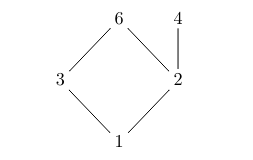

define um CPO com altura 2 e largura 2. Neste caso, o CPO não tem máximo. Cada elemento do conjunto $ \{4, 6\}$ é designado por **maximal**, pois nenhum deles tem elementos que lhe sejam superiores. No entanto, o CPO tem como mínimo o elemento $ 1 $.

**Definição  9:** Máximo e Mínimo

Seja $ P = (A, \leq) $ um CPO. Dizemos que $ n \in A $ é **máximo** se, para todo $ m \in A $, $ m \leq n $. Dizemos que $ n \in A $ é **mínimo** se, para todo $ m \in A $, $ n \leq m $.

**Definição 10:** Elemento Maximal e Elemento Minimal

Seja $ P = (A, \leq) $ um CPO. Dizemos que $ n \in A $ é **maximal** se não existir $ m \in A $ tal que $m \neq n $ e $ n \leq m $. Dizemos que $n \in A $ é **minimal** se não existir $ m \in A $ tal que $ m \neq n $ e $ m \leq n $.

Relativamente à relação de ordem de um CPO, os seus subconjuntos são habitualmente caracterizados recorrendo às noções apresentadas abaixo.

**Definição 11:** Máximos, Mínimos, Supremo, Ínfimo, Majorantes e Minorantes

Seja $ P = (A, \leq) $ um CPO e $ C $ um subconjunto de $ A $:
1. $ m \in A $ é **majorante** de $ C $ se e só se, para todo $ a \in C $, $ a \leq m $;
2. $ m \in A $ é **minorante** de $ C $ se e só se, para todo $ a \in C $, $ m \leq a $;
3. $ s \in A $ é **supremo** de $ C $ se e só se $ s $ é majorante de $ C $ e, para qualquer outro majorante $ s' $ de $ C $, temos $ s \leq s' $. Se $ s \in C $, então $ s $ designa-se por **elemento máximo** de $ C $;
4. $ i \in A $ é **ínfimo** de $ C $ se e só se $ i $ é minorante de $ C $ e, para qualquer outro minorante $ i' $ de $ C $, temos $ i' \leq i $. Se $ i \in C $, então $ i $ designa-se por **elemento mínimo** de $ C $;
5. $ m \in C $ é **elemento maximal** de $ C $ se não existir $ s' \in C $ tal que $ s' \neq m $ e $ m \leq s' $;
6. $ m \in C $ é **elemento minimal** de $ C $ se não existir $ s' \in C $ tal que $ s' \neq m $ e $ s' \leq m $.

Apliquemos estas noções.

**Exemplo 16**: O diagrama abaixo define um CPO com o conjunto de suporte $ A = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11\} $. Consideremos o subconjunto de $ A $, $ S = \{4, 5, 6\} $. Relativamente à ordem parcial, $S $ tem:
1. **Majorantes** $ M(S) = \{6, 7, 8, 9\} $, pois 6, 7, 8 e 9 são comparáveis e maiores ou iguais aos elementos de $ S $;
2. **Minorantes** $ m(S) = \{1, 2, 3\} $, pois 1, 2 e 3 são comparáveis e menores ou iguais aos elementos de $ S $;
3. **Supremo** $ \sup(S) = 6 $, pois $ 6 $ é o menor dos majorantes;
4. **Ínfimo** $ \inf(S) = 3 $, pois $ 3 $ é o maior dos minorantes;
5. **Elemento máximo** de $ S $ é $ 6 $, pois $6$ é o supremo e $ \sup(S) \in S $;
6. Não existe **elemento mínimo**, pois $ \inf(S) \notin S $.

![image](images/CPO1.png)

In [30]:
def sup_inf(X, relations, S):
    # Converter relations para um conjunto para busca eficiente
    rel_set = set(relations)

    # Encontrar limites superiores (upper bounds) de S
    upper_bounds = set()
    for x in X:
        is_upper_bound = True
        for a in S:
            if (a, x) not in rel_set:  # Se algum a em S não é <= x
                is_upper_bound = False
                break
        if is_upper_bound:
            upper_bounds.add(x)

    # Encontrar o supremo (menor limite superior)
    sup = None
    if upper_bounds:  # Se há limites superiores
        for u in upper_bounds:
            is_least = True
            for v in upper_bounds:
                if v != u and (u, v) not in rel_set:  # Se existe v <= u não satisfeito
                    is_least = False
                    break
            if is_least:
                sup = u
                break

    # Encontrar limites inferiores (lower bounds) de S
    lower_bounds = set()
    for x in X:
        is_lower_bound = True
        for a in S:
            if (x, a) not in rel_set:  # Se algum x não é <= a
                is_lower_bound = False
                break
        if is_lower_bound:
            lower_bounds.add(x)

    # Encontrar o ínfimo (maior limite inferior)
    inf = None
    if lower_bounds:  # Se há limites inferiores
        for l in lower_bounds:
            is_greatest = True
            for m in lower_bounds:
                if m != l and (m, l) not in rel_set:  # Se existe m <= l não satisfeito
                    is_greatest = False
                    break
            if is_greatest:
                inf = l
                break

    return (sup, inf)

# Teste com o exemplo fornecido
X = {1, 2, 3}
relations = [(1, 1), (2, 2), (3, 3), (1, 2), (1, 3), (2, 3)]
S = {1, 2}
resultado = sup_inf(X, relations, S)
print("Supremo e Ínfimo de S:", resultado)

Supremo e Ínfimo de S: (2, 1)


**Explicação do Código**

1. **Conversão para Conjunto**:
   - `rel_set = set(relations)` facilita buscas rápidas ($ O(1) $ em média).

2. **Encontrar Limites Superiores**:
   - Para cada $ x \in X $, verificamos se $ x $ é um limite superior de $ S $, ou seja, se $ a \leq x $ para todo $ a \in S $ (isto é, $ (a, x) \in \text{rel\_set} $).
   - Se $ x $ passar no teste, é adicionado a $ \text{upper\_bounds} $.

3. **Determinar o Supremo**:
   - Entre os limites superiores, procuramos o menor $ s $, tal que para todo outro limite superior $ s' $, $ s \leq s' $ (ou seja, $ (s, s') \in \text{rel\_set} $).
   - Se não houver um único menor (ou nenhum limite superior), $ \text{sup} = \text{None} $.

4. **Encontrar Limites Inferiores**:
   - Para cada $ x \in X $, verificamos se $ x $ é um limite inferior de $ S $, ou seja, se $ x \leq a $ para todo $ a \in S $ (isto é, $ (x, a) \in \text{rel\_set} $).
   - Se $ x $ passar no teste, é adicionado a $ \text{lower\_bounds} \).

5. **Determinar o Ínfimo**:
   - Entre os limites inferiores, procuramos o maior ($ i $), tal que para todo outro limite inferior $ i' $, $ i' \leq i $ (ou seja, $ (i', i) \in \text{rel\_set} $).
   - Se não houver um único maior (ou nenhum limite inferior), $ \text{inf} = \text{None} $.

6. **Retorno**:
   - Retorna a tupla $ (\text{sup}, \text{inf}) $.

## Exercícios de Revisão

**Exercício 1**: Para cada uma das seguintes relações definidas no conjunto $ \{1, 2, 3, 4, 5\} $, determine se a relação é reflexiva, antissimétrica e/ou transitiva:
1. $ \{(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)\} $
2. $ \{(1, 2), (2, 3), (3, 4), (4, 5)\} $
3. $ \{(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)\} $
4. $ \{(1, 1), (1, 2), (2, 1), (3, 4), (4, 3)\} $
5. $ \{1, 2, 3, 4, 5\} \times \{1, 2, 3, 4, 5\} $

**Exercício 2**: Dado $ S = \{1, 2, \ldots, 10\} $ e a relação $ R $ em $ S $ definida por $ R = \{(x, y) : x + y = 10\} $, classifique a relação $ R $.

**Exercício 3**: Determine $ R^{-1} $ para cada uma das seguintes relações:
1. $ R = \{(1, 2), (2, 3), (3, 4)\} $
2. $ R = \{(1, 1), (2, 2), (3, 3)\} $
3. $ R = \{(x, y) : x, y \in \mathbb{Z}, x - y = 1\} $
4. $ R = \{(x, y) : x, y \in \mathbb{N}, y \text{ divide } x\} $
5. $ R = \{(x, y) : x, y \in \mathbb{Z}, xy > 0\} $

**Exercício 4**: Quais dos seguintes conjuntos são relações de equivalência?
1. $ R = \{(1, 1), (1, 2), (2, 1), (2, 2), (3, 3)\} $ no conjunto $ A = \{1, 2, 3\} $
2. $ R = \{(1, 2), (2, 3), (3, 1)\} $ no conjunto $ A = \{1, 2, 3\}$
3. $ \leq $ em $ \mathbb{Z} $
4. $ \{1, 2, 3\} \times \{1, 2, 3\} $ no conjunto $ \{1, 2, 3\} $
5. $ \{1, 2, 3\} \times \{1, 2, 3\} $ no conjunto $ \{1, 2, 3, 4\} $

**Exercício 5**: Para cada relação de equivalência, encontre a classe de equivalência pedida:
1. $ R = \{(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (4, 4)\} $ em $ \{1, 2, 3, 4\} $. Determine $ [1] $.
2. $ R = \{(1, 1), (1, 2), (2, 1), (2, 2), (3, 3), (4, 4)\} $ em $ \{1, 2, 3, 4\} $. Determine $ [4] $.
3. Em $ \{x \in \mathbb{Z} : 100 < x < 200\} $, $ x R y $ se $ x $ e $ y $ têm o mesmo algarismo das dezenas. Determine $ [123] $.

**Exercício 6**: Seja $ R $ a relação no conjunto de pares ordenados de inteiros positivos tal que $ (x, y) R (u, v) $se e só se $ xv = yu $. Mostre que $ R $ é uma relação de equivalência.

**Exercício 7**: Mostre que uma relação $ R $ é simétrica se e só se $ R = R^{-1} $.

**Exercício 8**: Dê um exemplo de uma relação que seja simétrica e transitiva, mas não reflexiva. Explique o que está errado no seguinte argumento:  
“Seja $ R $ simétrica e transitiva. Pela simetria, se $ x R y $, então $ y R x $. Aplicando a transitividade a $ x R y $ e $ y R x $, obtemos $ x R x $. Portanto, $ R $ é reflexiva.”

**Exercício 9**: Dado o conjunto $ S = \{1, 2, 3, 4, 5\} $, apresente uma relação de equivalência em $ S $ que determine a partição $ \{\{1, 2\}, \{3\}, \{4, 5\}\} $. Represente a relação graficamente.

**Exercício 10**: Mostre que a relação “congruente módulo $ m $”, definida no conjunto dos inteiros por $ \equiv = \{(x, y) : x - y \text{ é divisível por } m\} $, é uma relação de equivalência. Demonstre que, se $ x_1 \equiv y_1$ e $ x_2 \equiv y_2 $, então $ (x_1 + x_2) \equiv (y_1 + y_2) $.

**Exercício 11**: Para duas relações de equivalência $ R $ e $ S $ definidas pelas matrizes:  

$$
M_R = \begin{bmatrix} 1 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \quad \text{e} \quad M_S = \begin{bmatrix} 1 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 1 \end{bmatrix} 
$$  

Obtenha relações de equivalência $ R_1 $ e $ R_2 $ em $ \{1, 2, 3\} $ tais que $ R_1 \circ R_2 $ seja também uma relação de equivalência.

**Exercício 1**: Desenhe os diagramas de Hasse dos conjuntos abaixo relativamente à relação de ordem parcial "divide" e indique se cada um constitui uma ordem total:
- $ \{2, 6, 24\} $
- $ \{3, 5, 15\} $
- $ \{1, 2, 3, 6, 12\} $
- $ \{2, 4, 8, 16\} $
- $\{3, 9, 27, 54\} $

**Exercício 12**: Se $ R $ é uma ordem parcial em $ X $ e $A \subseteq X $, mostre que $ R \cap (A \times A) $ é uma ordem parcial em $ A $.

**Exercício 13**: Apresente um exemplo de um conjunto $ X $ tal que $ (P(X), \subseteq) $ seja um conjunto totalmente ordenado.

**Exercício 14**: Apresente um exemplo de uma relação que seja simultaneamente uma ordem parcial e uma relação de equivalência num conjunto $ X $.

**Exercício 15**: A figura abaixo representa o diagrama de Hasse de uma ordem parcial $ (P, R) $, onde $ P = \{x_1, x_2, \ldots, x_5\} $:

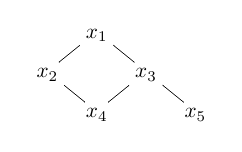

Determine o valor de verdade das proposições: $ x_1 R x_2 $, $ x_4 R x_1 $, $ x_3 R x_5 $, $ x_2 R x_5 $, $ x_1 R x_1 $, $ x_2 R x_3 $ e $ x_4 R x_5 $. Caso exista, determine o maior elemento e o menor elemento em $ P $. Determine os majorantes e minorantes dos subconjuntos $ \{x_2, x_3, x_4\} $, $ \{x_3, x_4, x_5\} $ e $ \{x_1, x_2, x_3\} $. Caso existam, determine também, para estes conjuntos, o menor dos majorantes e o maior dos minorantes.

**Exercício 16**: Considere os seguintes conjuntos e as relações neles definidas. Determine quais das relações são de ordem parcial:
1. $ A = \{3, 5, 6, 10, 15, 18, 20\} $, $ R \subset A \times A $, tal que $(x, y) \in R $ se e só se $ x $ é múltiplo de $ y $.
2. $ R \subset \mathbb{N} \times \mathbb{N} $, tal que $ xy \% 3 = 0 $ (o produto $ xy $ é divisível por 3).
3. $ A = \{1, 2, 3, 4, 5\} $, $ R \subset A \times A $, tal que $ (x, y) \in R $ se e só se $ x $ divide $ y $.

**Exercício 17**: Considere o conjunto $ X = \{1, 2, 3, 4, 5, 6, 7, 8\} $, parcialmente ordenado de acordo com o diagrama de Hasse abaixo. Considere ainda os subconjuntos $ A = \{4, 5, 7\} $ e $ B = \{1, 2, 4, 7\} $. Determine, caso existam:
1. Os elementos maximais, minimais, máximo e mínimo de $ X $.
2. Os majorantes, minorantes, supremo e ínfimo de $ A $ e $ B $.

![image](images/hasse2.png)

Considere ainda os subconjuntos $ A = \{4, 5, 7\} $ e $B = \{1, 2, 4, 7\} $. Determine, caso existam:
1. Os elementos maximais, minimais, máximo e mínimo de $ X $.
2. Os majorantes, minorantes, supremo e ínfimo de  $A $ e $ B $.

**Exercício 18**: Considere o conjunto $ X = \{1, 2, 3, 4, 5, 6, 7, 8\} $, parcialmente ordenado de acordo com o diagrama de Hasse abaixo .

![image](images/hasse3.png)

 Considere ainda os subconjuntos $ A = \{4, 5, 7\} $ e $ B = \{1, 2, 4, 7\} $. Determine, caso existam:
1. Os elementos maximais, minimais, máximo e mínimo de $ X $.
2. Os majorantes, minorantes, supremo e ínfimo de $ A $ e $ B $.

**Exercício 19**: Considere o conjunto $ X = \{1, 2, 3, 4, 5, 6, 7, 8\} $, parcialmente ordenado de acordo com o diagrama de Hasse antrior . Considere ainda os subconjuntos $ A = \{4, 3, 7\} $ e $ B = \{2, 3, 4, 5\} $. Determine, caso existam:
1. Os elementos maximais, minimais, máximo e mínimo de $ X $.
2. Os majorantes, minorantes, supremo e ínfimo de $A $ e $ B $.

**Exercício 20**: Considere em $ \mathbb{N} $ a relação $ | $ definida por $ x | y $ se e só se existe $ k \in \mathbb{N} $ tal que $ y = kx $ (i.e., $ x $ divide $ y $):
1. Mostre que $ (\mathbb{N}, |) $ é um CPO, mas não um conjunto totalmente ordenado.
2. Dados $a, b \in \mathbb{N} $, determine, caso existam, o supremo e o ínfimo de $ \{a, b\} $.
3. Diga, justificando, se $(\mathbb{N}, |) $ tem elemento máximo ou elemento mínimo.
4. Seja $ X = \{1, 2, 3, 4, 6, 8, 9, 12\} $:
   (a) Construa o diagrama de Hasse de $ (X, |) $.
   (b) Indique, caso existam, os elementos maximais e os elementos minimais de $ X $.

**Exercício 21**: Considere os conjuntos:
- $ A = \{\emptyset, \{1\}, \{1, 2\}, \{1, 3\}, \{1, 2, 3\}, \{1, 2, 4\}, \{1, 2, 3, 4\}, \{4\}\} $,
- $ X = \{\{1\}, \{4\}, \{1, 2\}, \{1, 3\}\} $.
1. Construa o diagrama de Hasse de $ (A, \subseteq) $.
2. Indique, caso existam, os elementos maximais, minimais, supremo, ínfimo, máximo e mínimo de $ X $.

**Exercício 22**: Considere no conjunto $ A = \{1, 2, 3, 4\} $ as relações:
- $ R = \{(1, 1), (2, 2), (3, 3), (4, 4), (1, 2), (1, 3), (4, 3)\} $,
- $ S = \{(1, 1), (2, 2), (3, 3), (4, 4), (1, 3), (3, 2), (3, 4)\} $.
1. Indique quais das relações são relações de ordem parcial. Justifique.
2. Construa os respetivos diagramas de Hasse.

## Exercícios de Programação
**Exercício 23:** Verificar se é um Poset
Escreva uma função `is_poset(X, relations)` que recebe um conjunto $X$ e uma lista de pares `relations` onde cada par $(a,b)$ significa $a \leq b$, e retorna True se `relations` define uma ordem parcial em $X$ (ou seja, é reflexiva, antissimétrica e transitiva), False caso contrário. Certifique-se de que `relations` inclui todos os pares reflexivos $(x,x)$ para $x \in X$.  
Teste com:  
- $X = \{1, 2, 3\}$, `relations = [(1,1), (2,2), (3,3), (1,2), (2,3), (1,3)]` → True  
- $X = \{1, 2, 3\}$, `relations = [(1,1), (2,2), (3,3), (1,2), (2,1)]` → False (falha na antissimetria)

**Exercício 24:** Encontrar Elementos Maximais e Mínimos
Escreva uma função `find_maximal_minimal(X, relations)` que recebe um conjunto $X$ e uma lista de pares `relations` (assumindo que é um poset, com todos os pares reflexivos), e retorna duas listas: os elementos maximais (aqueles sem $y \neq x$ tal que $(x,y)$ em `relations`) e os elementos mínimos (sem $y \neq x$ tal que $(y,x)$ em `relations`).  
Teste com:  
- $X = \{1, 2, 3\}$, `relations = [(1,1), (2,2), (3,3), (1,2), (1,3)]` → maximais=[2,3], mínimos=[1]

**Exercício 25:** Calcular Altura e Largura
Escreva uma função `height_width(X, relations)` que recebe um conjunto $X$ e uma lista de pares `relations` (assumindo poset), e retorna uma tupla `(altura, largura)` onde a altura é o número máximo de elementos numa cadeia (sequência mais longa $a_1 \leq a_2 \leq \cdots \leq a_k$), e a largura é o tamanho da maior anticadeia (maior conjunto onde nenhum par é comparável). Use uma abordagem gulosa para a largura: continue adicionando elementos incomparáveis.  
Teste com:  
- $X = \{1, 2, 3\}$, `relations = [(1,1), (2,2), (3,3), (1,2), (1,3)]` → altura=3 (ex.: cadeia 1,2,3), largura=1 (ex.: {2} ou {3})






## Referências:

1. **"Discrete Mathematics and Its Applications"**  
   **Autor:** Kenneth H. Rosen  
   **Descrição:** Este livro é um recurso abrangente que cobre diversos tópicos de matemática discreta, incluindo relações de equivalência e ordens parciais. Oferece uma abordagem prática com exemplos e exercícios aplicados à ciência da computação.  
   **Tópicos-chave:** Relações binárias, relações de equivalência, ordens parciais, diagramas de Hasse, aplicações em algoritmos e estruturas de dados.

2. **"Introduction to Lattices and Order"**  
   **Autores:** B. A. Davey e H. A. Priestley  
   **Descrição:** Este livro fornece uma introdução acessível às estruturas de ordens e reticulados, explorando conceitos fundamentais e suas aplicações. É particularmente útil para compreender a teoria das ordens parciais e suas implicações em várias áreas da matemática e ciência da computação.  
   **Tópicos-chave:** Ordens parciais, reticulados, teoria das categorias, aplicações em lógica e ciência da computação.

3. **"Combinatorics: The Rota Way"**  
   **Autores:** Joseph P. S. Kung, Gian-Carlo Rota e Catherine H. Yan  
   **Descrição:** Este texto aborda a análise combinatória de uma perspectiva algébrica, incluindo discussões sobre relações de equivalência e ordens parciais. Baseia-se nas palestras de Rota no MIT e oferece insights profundos sobre a interseção entre a análise combinatória e outras áreas matemáticas.  
   **Tópicos-chave:** Relações de equivalência, ordens parciais, reticulados, teoria combinatória.

4. **"Discrete Mathematics: An Open Introduction"**  
   **Autor:** Oscar Levin  
   **Descrição:** Este livro oferece uma introdução aos conceitos fundamentais da matemática discreta, incluindo um capítulo dedicado a relações e grafos, onde são exploradas as relações de equivalência e ordens parciais. O texto é acessível e inclui numerosos exemplos e exercícios.  
   **Tópicos-chave:** Relações, grafos, relações de equivalência, ordens parciais, aplicações em ciência da computação.
